<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M3/notebooks/CNN_with_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's start by downloading and exploring the data
!wget -qq https://storage.googleapis.com/sds-file-transfer/dataset.zip
# We need to unzip the data...and as you can see there is a lot
!unzip -qq dataset.zip

In [2]:
# Install the fastAI library (a wrapper for PyTorch)
!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 9.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 


In [3]:
# Import the Fastai library (all modules)
from fastai.vision.all import *

In [4]:
# Define data-flow pipeline
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files, #where do images come from
   get_y=parent_label, #where do targets come from
   splitter=RandomSplitter(valid_pct=0.2, seed=42), #train-test-split
   item_tfms=RandomResizedCrop(224, min_scale=0.5), #data aufmentation
   batch_tfms=aug_transforms())

This is all you need to define the "data-engineering" part

In [5]:
dls = fields.dataloaders('/content/dataset/training_set') # point to data directory and load

In [6]:
dls.vocab # check labels

['cats', 'dogs']

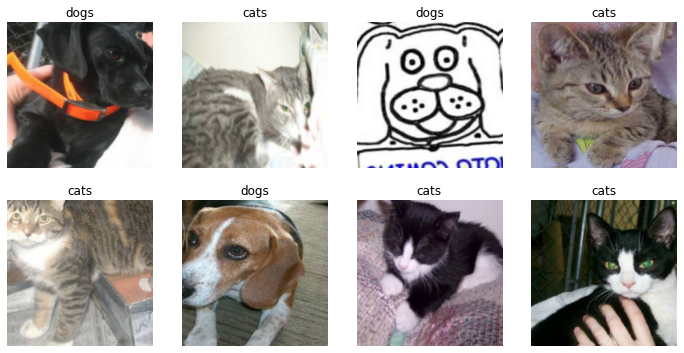

In [7]:
dls.show_batch(max_n=8, nrows = 2) #show some examples

In [8]:
# Define transfer learning based on resnet34
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


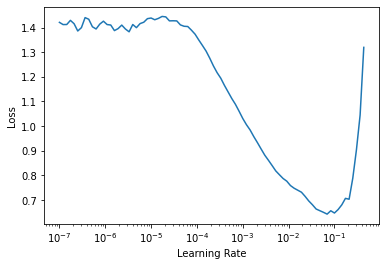

In [9]:
# determin a good learning rate
lr_min, lr_steep = learn.lr_find()

In [10]:
# Run five training epochs
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.154362,0.048837,0.012500,00:47
1,0.104467,0.038919,0.015625,00:47
2,0.065417,0.022166,0.010625,00:46
3,0.046342,0.026384,0.008750,00:46
4,0.032298,0.021561,0.008125,00:45


Check out https://arxiv.org/abs/1803.09820 for more info on adjusting neural net hyperparameters

In [11]:
# Evaluate
interp = ClassificationInterpretation.from_learner(learn)

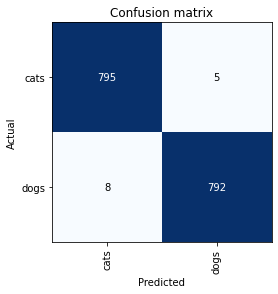

In [12]:
# Plot confusion matrix
interp.plot_confusion_matrix()

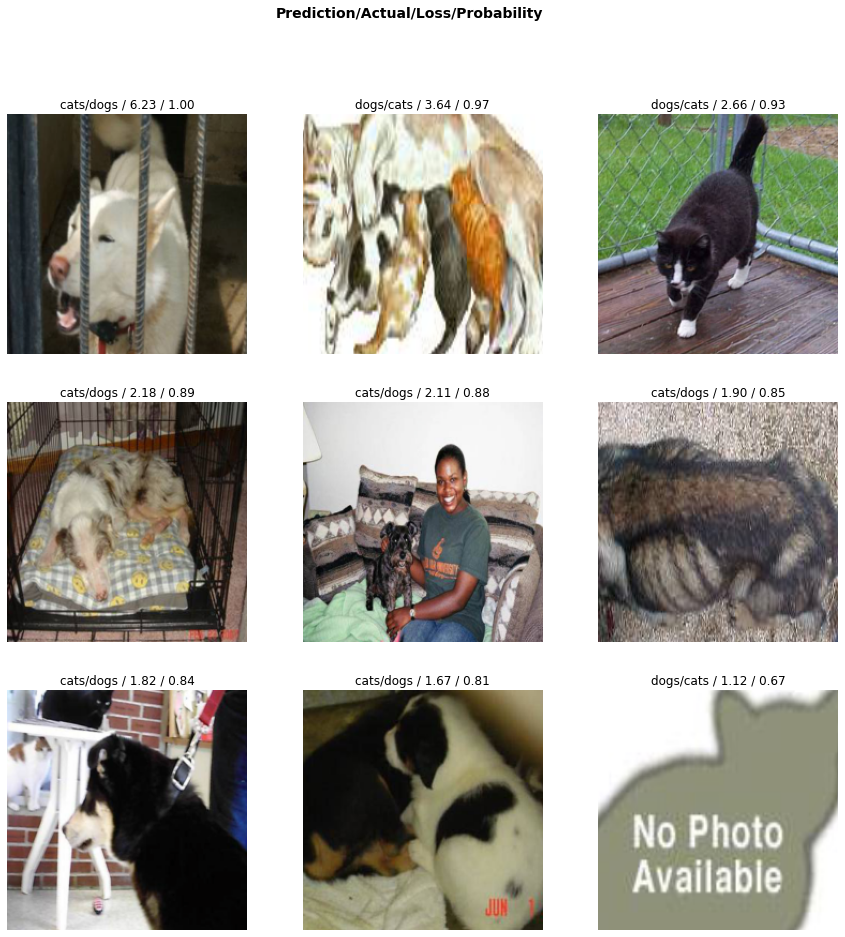

In [13]:
interp.plot_top_losses(9, figsize=(15,15))

In [14]:
#run inference on test images
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()


/content/dataset/test_set/cats/cat.4724.jpg


cats


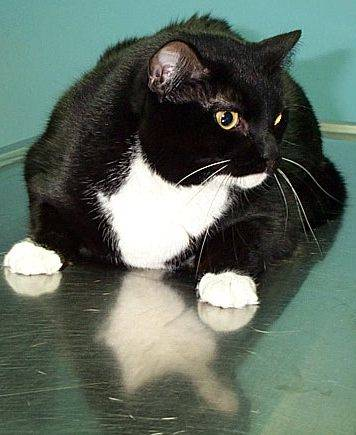



/content/dataset/test_set/cats/cat.4435.jpg


cats


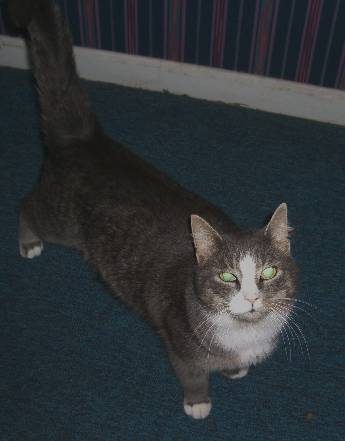



/content/dataset/test_set/cats/cat.4024.jpg


cats


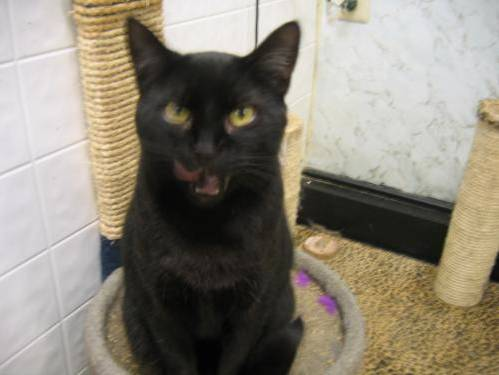



/content/dataset/test_set/cats/cat.4917.jpg


cats


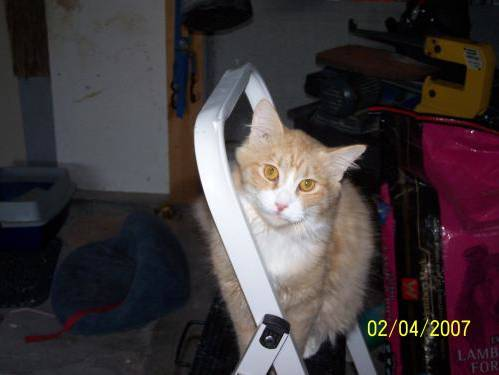



/content/dataset/test_set/cats/cat.4654.jpg


cats


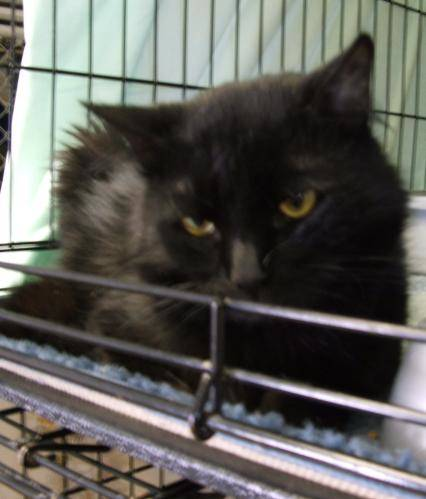



/content/dataset/test_set/cats/cat.4932.jpg


cats


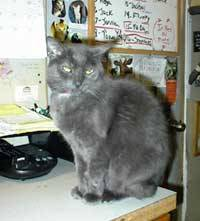



/content/dataset/test_set/cats/cat.4456.jpg


cats


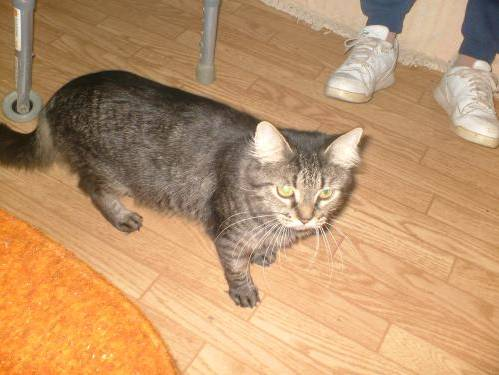



/content/dataset/test_set/cats/cat.4742.jpg


cats


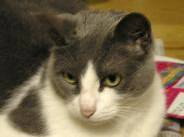



/content/dataset/test_set/cats/cat.4437.jpg


cats


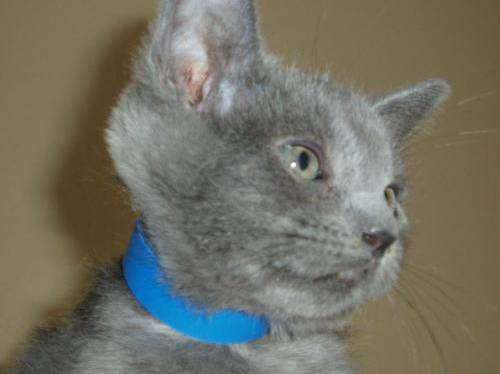



/content/dataset/test_set/cats/cat.4568.jpg


cats


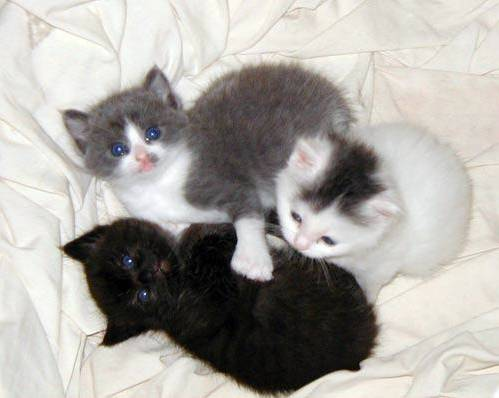



/content/dataset/test_set/cats/cat.4788.jpg


cats


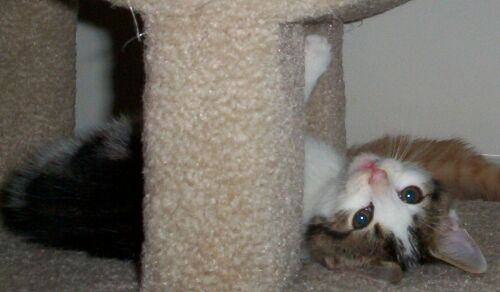



/content/dataset/test_set/cats/cat.4995.jpg


cats


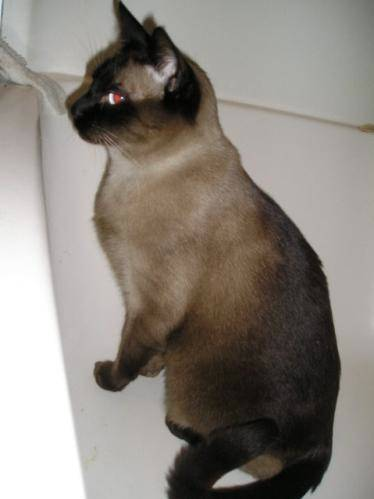



/content/dataset/test_set/cats/cat.4040.jpg


cats


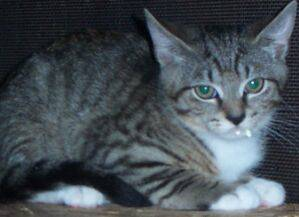



/content/dataset/test_set/cats/cat.4065.jpg


cats


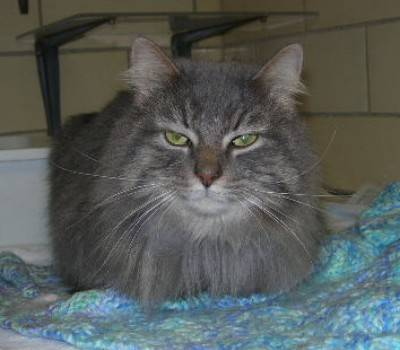



/content/dataset/test_set/cats/cat.4529.jpg


cats


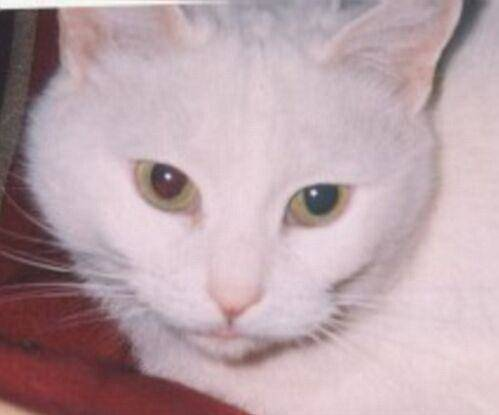



/content/dataset/test_set/cats/cat.4280.jpg


cats


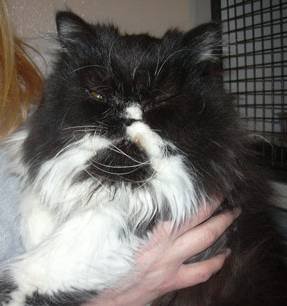



/content/dataset/test_set/cats/cat.5000.jpg


cats


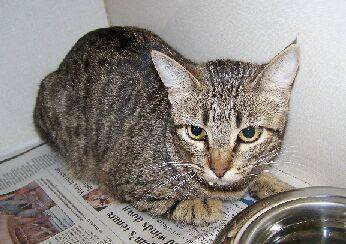



/content/dataset/test_set/cats/cat.4042.jpg


cats


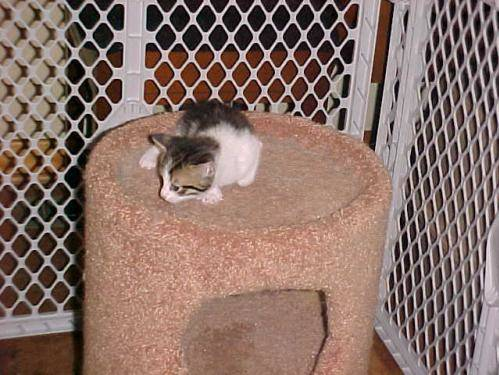



/content/dataset/test_set/cats/cat.4674.jpg


cats


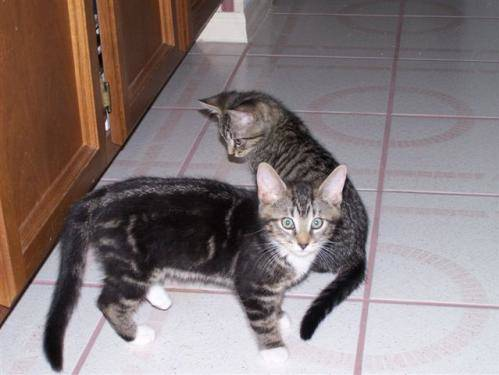



/content/dataset/test_set/cats/cat.4749.jpg


cats


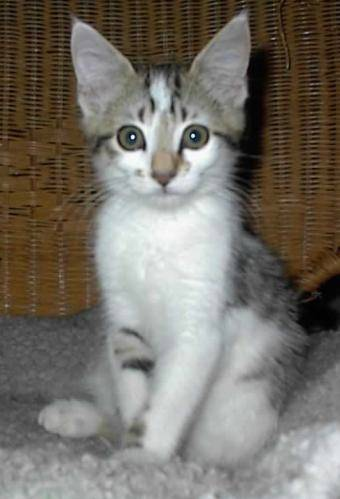

In [15]:
# Make predictions for a few images

for imageName in get_image_files('/content/dataset/test_set')[:20]:
    print(imageName)
    prediction = learn.predict(imageName)
    #print(prediction)
    print(prediction[0])
    display(Image(filename=str(imageName)))
    print("\n")

In [16]:
# Make more predictions

files = get_image_files('/content/dataset/test_set')

In [18]:
# predict into a pandas DF from a directory path
evaluation = []

for imageName in get_image_files('/content/dataset/test_set'):
  prediction = learn.predict(imageName)
  evaluation.append((imageName.parent.stem, prediction[0], float(prediction[2][0])))

In [19]:
import pandas as pd
ev = pd.DataFrame(evaluation)

In [20]:
ev

,0,1,2
0,cats,cats,9.999993e-01
1,cats,cats,9.999744e-01
2,cats,cats,9.984217e-01
3,cats,cats,9.999999e-01
4,cats,cats,9.999911e-01
...,...,...,...
1995,dogs,dogs,1.351911e-06
1996,dogs,dogs,1.868116e-06
1997,dogs,dogs,8.317731e-04
1998,dogs,dogs,7.891443e-07


In [21]:
pd.crosstab(ev[0],ev[1])

1,cats,dogs
0,,
cats,991,9
dogs,9,991
